In [17]:
!pip install opencv-python ultralytics matplotlib
import os
import cv2
from ultralytics import YOLO
import matplotlib.pyplot as plt

def mount_google_drive():
    """Mounts Google Drive in Colab environment."""
    from google.colab import drive
    drive.mount('/content/drive')

model = YOLO("yolo12n.pt")


0: 448x640 6 persons, 15 cars, 1 motorcycle, 1 bus, 2 trucks, 176.8ms
Speed: 2.1ms preprocess, 176.8ms inference, 1.4ms postprocess per image at shape (1, 3, 448, 640)


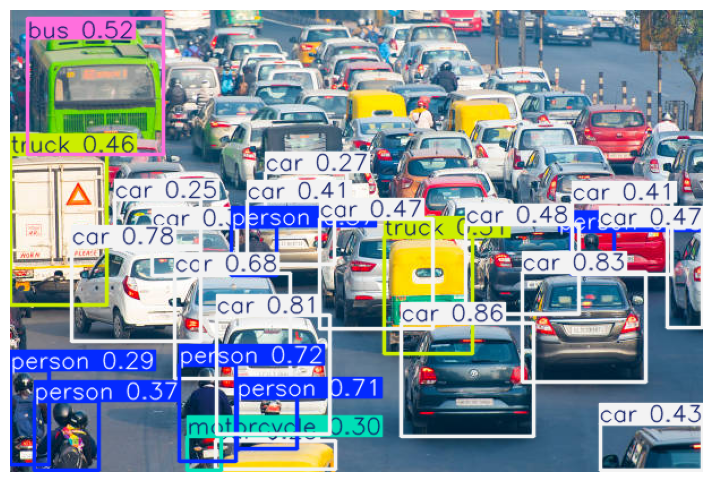

Annotated image saved to /content/annotated.jpg


In [12]:
def detect_image(model, img_path: str, output_path: str = None):
    img = cv2.imread(img_path)
    if img is None:
        print(f"Error: Unable to read image at {img_path}")
        return

    results = model(img)
    annotated_bgr = results[0].plot()
    annotated_rgb = cv2.cvtColor(annotated_bgr, cv2.COLOR_BGR2RGB)

    plt.figure(figsize=(10, 6))
    plt.imshow(annotated_rgb)
    plt.axis('off')
    plt.show()

    if output_path:
        cv2.imwrite(output_path, annotated_bgr)
        print(f"Annotated image saved to {output_path}")

# Run detection
model = load_model('yolo12n.pt')
detect_image(model, '/content/testing001.jpg', output_path='/content/annotated.jpg')

In [20]:
import cv2
from ultralytics import YOLO

# Load the YOLO model (already done, but make sure it's available)
# model = YOLO('yolov8n.pt')  # or 'yolov8s.pt' or your trained model

def detect_and_save_video(model, input_video_path: str, output_video_path: str):
    cap = cv2.VideoCapture(input_video_path)
    if not cap.isOpened():
        print(f"❌ Cannot open video: {input_video_path}")
        return

    width  = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
    fps    = cap.get(cv2.CAP_PROP_FPS)

    # Setup video writer
    fourcc = cv2.VideoWriter_fourcc(*'mp4v')  # Codec
    writer = cv2.VideoWriter(output_video_path, fourcc, fps, (width, height))

    frame_idx = 0
    while True:
        ret, frame = cap.read()
        if not ret:
            break

        # Perform detection
        results = model(frame)
        annotated_frame = results[0].plot()  # Plot detections on frame

        # Write the annotated frame to output video
        writer.write(annotated_frame)

        frame_idx += 1

    cap.release()
    writer.release()
    print(f"✅ Done! Annotated video saved to: {output_video_path}")

In [21]:
detect_and_save_video(model, '/content/Kolkatavid.mp4', '/content/Kolkata_annotated.mp4')



0: 320x640 3 cars, 164.4ms
Speed: 2.3ms preprocess, 164.4ms inference, 1.1ms postprocess per image at shape (1, 3, 320, 640)

0: 320x640 3 cars, 104.1ms
Speed: 2.1ms preprocess, 104.1ms inference, 0.9ms postprocess per image at shape (1, 3, 320, 640)

0: 320x640 3 cars, 1 truck, 109.1ms
Speed: 50.5ms preprocess, 109.1ms inference, 0.9ms postprocess per image at shape (1, 3, 320, 640)

0: 320x640 3 cars, 1 truck, 99.9ms
Speed: 2.3ms preprocess, 99.9ms inference, 0.9ms postprocess per image at shape (1, 3, 320, 640)

0: 320x640 3 cars, 1 truck, 161.5ms
Speed: 2.0ms preprocess, 161.5ms inference, 1.1ms postprocess per image at shape (1, 3, 320, 640)

0: 320x640 3 cars, 101.5ms
Speed: 2.0ms preprocess, 101.5ms inference, 1.0ms postprocess per image at shape (1, 3, 320, 640)

0: 320x640 3 cars, 155.5ms
Speed: 2.0ms preprocess, 155.5ms inference, 1.0ms postprocess per image at shape (1, 3, 320, 640)

0: 320x640 4 cars, 1 truck, 102.8ms
Speed: 2.1ms preprocess, 102.8ms inference, 0.9ms postp